In [1]:
import warnings
warnings.filterwarnings("ignore")

from typing import List, Dict, Tuple
import logging

import random
import numpy as np
import pandas as pd

import torch
from transformers import (
    GPT2LMHeadModel, GPT2Tokenizer,
    ViTFeatureExtractor, ViTModel, # transformer for computer vision
    CLIPProcessor, CLIPModel, # multi-modal vision and language model. It can be used for image-text similarity and for zero-shot image classification
    pipeline,
    AutoTokenizer, AutoModelForSequenceClassification
)

from PIL import Image
from IPython.display import Image as Image2

In [2]:
# ORIGINAL SCRIPT

# class SephoraAIAssistant:
#     def __init__(self):
#         # Initialize models
#         self.text_model = GPT2LMHeadModel.from_pretrained('gpt2')
#         self.text_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        
#         self.vision_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
#         self.vision_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
        
#         self.clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
#         self.clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
#         self.sentiment_analyzer = pipeline("sentiment-analysis")
        
#         # Product knowledge base
#         self.product_db = self._initialize_product_db()
        
#     def _initialize_product_db(self) -> pd.DataFrame:
#         """Initialize sample product database"""
#         return pd.DataFrame({
#             'product_id': range(1000),
#             'name': [f'Product_{i}' for i in range(1000)],
#             'description': [f'Description for product {i}' for i in range(1000)],
#             'category': np.random.choice(['Skincare', 'Makeup', 'Fragrance', 'Haircare'], 1000),
#             'price': np.random.uniform(10, 200, 1000)
#         })

#     def generate_product_description(self, product_info: Dict) -> str:
#         """
#         Generate marketing description for products
#         """
#         prompt = f"""Product: {product_info['name']}
# Category: {product_info['category']}
# Key Benefits: {product_info.get('benefits', '')}
# Generate an engaging product description:"""
        
#         inputs = self.text_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
#         outputs = self.text_model.generate(
#             inputs['input_ids'],
#             max_length=200,
#             num_return_sequences=1,
#             num_beams=5,  # Enable beam search
#             temperature=0.7
#         )
        
#         return self.text_tokenizer.decode(outputs[0], skip_special_tokens=True)

#     def analyze_customer_feedback(self, reviews: List[str]) -> Dict:
#         """
#         Analyze customer reviews for sentiment and key themes
#         """
#         sentiments = self.sentiment_analyzer(reviews)
        
#         # Aggregate sentiment scores
#         sentiment_scores = {
#             'positive': len([s for s in sentiments if s['label'] == 'POSITIVE']),
#             'negative': len([s for s in sentiments if s['label'] == 'NEGATIVE'])
#         }
        
#         return {
#             'sentiment_analysis': sentiment_scores,
#             'average_score': sum(s['score'] for s in sentiments) / len(sentiments)
#         }

#     def product_image_analysis(self, image_path: str) -> Dict:
#         """
#         Analyze product images for quality and consistency
#         """
#         image = Image.open(image_path)
        
#         # Process image with CLIP
#         inputs = self.clip_processor(images=image, return_tensors="pt")
#         image_features = self.clip_model.get_image_features(**inputs)
        
#         # Define product attributes to check
#         attributes = ["high quality", "professional", "clear", "well-lit", "consistent branding"]
#         text_inputs = self.clip_processor(text=attributes, return_tensors="pt", padding=True)
#         text_features = self.clip_model.get_text_features(**text_inputs)
        
#         # Calculate similarity scores
#         similarity = torch.nn.functional.cosine_similarity(image_features, text_features)
        
#         return {attr: score.item() for attr, score in zip(attributes, similarity[0])}

#     def generate_personalized_recommendations(
#         self, 
#         customer_profile: Dict,
#         purchase_history: List[Dict]
#     ) -> List[Dict]:
#         """
#         Generate personalized product recommendations using multi-modal data
#         """
#         # Create prompt incorporating customer profile and history
#         prompt = f"""Customer Profile:
# Age: {customer_profile.get('age')}
# Skin Type: {customer_profile.get('skin_type')}
# Concerns: {', '.join(customer_profile.get('concerns', []))}
# Recent Purchases: {', '.join(p['name'] for p in purchase_history[-3:])}

# Recommend products that would be suitable for this customer:"""

#         # Generate recommendations
#         inputs = self.text_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
#         outputs = self.text_model.generate(
#             inputs['input_ids'],
#             max_length=300,
#             num_return_sequences=3,
#             num_beams=5,  # Enable beam search
#             temperature=0.8
#         )
        
#         recommendations = []
#         for output in outputs:
#             text = self.text_tokenizer.decode(output, skip_special_tokens=True)
#             # Parse generated text to extract product recommendations
#             # This is a simplified version - in practice, you'd want more sophisticated parsing
#             recommendations.append({
#                 'product': text.split('\n')[0],
#                 'reasoning': text.split('\n')[1] if len(text.split('\n')) > 1 else ''
#             })
        
#         return recommendations

#     def virtual_beauty_assistant(self, customer_query: str, image_path: str = None) -> str:
#         """
#         Multi-modal virtual beauty assistant
#         """
#         # Process text query
#         response_context = "As a Sephora beauty assistant, "
        
#         if image_path:
#             # Process image if provided
#             image = Image.open(image_path)
#             image_features = self.vision_processor(image, return_tensors="pt")
#             image_analysis = self.vision_model(**image_features)
            
#             # Combine text and image understanding
#             response_context += "based on both your question and the image you've shared, "
        
#         # Generate response
#         prompt = f"{response_context}{customer_query}"
#         inputs = self.text_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True)
#         outputs = self.text_model.generate(
#             inputs['input_ids'],
#             max_length=200,
#             num_return_sequences=1,
#             num_beams=5,  # Enable beam search
#             temperature=0.7
#         )
        
#         return self.text_tokenizer.decode(outputs[0], skip_special_tokens=True)

# class BeautyTrendAnalyzer:
#     def __init__(self):
#         self.sentiment_model = AutoModelForSequenceClassification.from_pretrained(
#             "nlptown/bert-base-multilingual-uncased-sentiment"
#         )
#         self.sentiment_tokenizer = AutoTokenizer.from_pretrained(
#             "nlptown/bert-base-multilingual-uncased-sentiment"
#         )
        
#     def analyze_social_media_trends(self, posts: List[Dict]) -> Dict:
#         """
#         Analyze beauty trends from social media data
#         """
#         trends = {
#             'trending_products': {},
#             'sentiment_by_category': {},
#             'emerging_keywords': {}
#         }
        
#         # Process each post
#         for post in posts:
#             # Analyze text content
#             sentiment = self.analyze_sentiment(post['text'])
            
#             # Update trend data
#             self._update_trending_products(post, sentiment)
#             self._update_category_sentiment(post, sentiment)
#             self._extract_keywords(post['text'])
            
#         return trends
    
#     def analyze_sentiment(self, text: str) -> float:
#         inputs = self.sentiment_tokenizer(text, return_tensors="pt", truncation=True)
#         outputs = self.sentiment_model(**inputs)
#         return torch.softmax(outputs.logits, dim=1)

# def main():
#     # Initialize assistant
#     sephora_assistant = SephoraAIAssistant()
#     trend_analyzer = BeautyTrendAnalyzer()
    
#     # Example usage
    
#     # 1. Generate product description
#     product_info = {
#         'name': 'Hydrating Serum',
#         'category': 'Skincare',
#         'benefits': 'Hydration, Anti-aging, Brightening'
#     }
#     description = sephora_assistant.generate_product_description(product_info)
#     print(f"Generated Description: {description}\n")
    
#     # 2. Analyze customer feedback
#     reviews = [
#         "Love this product! My skin feels amazing.",
#         "Didn't work for my skin type.",
#         "Great results after 2 weeks of use!"
#     ]
#     feedback_analysis = sephora_assistant.analyze_customer_feedback(reviews)
#     print(f"Feedback Analysis: {feedback_analysis}\n")
    
#     # 3. Generate personalized recommendations
#     customer_profile = {
#         'age': 28,
#         'skin_type': 'Combination',
#         'concerns': ['Acne', 'Dark spots']
#     }
#     purchase_history = [
#         {'name': 'Cleanser X'},
#         {'name': 'Toner Y'},
#         {'name': 'Moisturizer Z'}
#     ]
#     recommendations = sephora_assistant.generate_personalized_recommendations(
#         customer_profile,
#         purchase_history
#     )
#     print(f"Personalized Recommendations: {recommendations}\n")

# if __name__ == "__main__":
#     main()

In [3]:
# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize models and processors
text_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
text_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

vision_model = ViTModel.from_pretrained(
    'google/vit-base-patch16-224',
    ignore_mismatched_sizes=True  # Suppress pooler warning
).to(device)
vision_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=0 if device == "cuda" else -1  # Use GPU if available
)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [4]:
def initialize_product_db():
        """Initialize sample product database"""
        return pd.DataFrame({
            'product_id': range(1000),
            'name': [f'Product_{i}' for i in range(1000)],
            'description': [f'Description for product {i}' for i in range(1000)],
            'category': np.random.choice(['Skincare', 'Makeup', 'Fragrance', 'Haircare'], 1000),
            'price': np.random.uniform(10, 200, 1000)
        })

# Product knowledge base
product_db = initialize_product_db()
product_db

product_id         name                  description   category  \
0             0    Product_0    Description for product 0  Fragrance   
1             1    Product_1    Description for product 1     Makeup   
2             2    Product_2    Description for product 2  Fragrance   
3             3    Product_3    Description for product 3   Haircare   
4             4    Product_4    Description for product 4   Skincare   
..          ...          ...                          ...        ...   
995         995  Product_995  Description for product 995  Fragrance   
996         996  Product_996  Description for product 996   Haircare   
997         997  Product_997  Description for product 997     Makeup   
998         998  Product_998  Description for product 998  Fragrance   
999         999  Product_999  Description for product 999   Haircare   

          price  
0     93.967598  
1    160.214576  
2    131.914545  
3    191.057245  
4     35.765261  
..          ...  
995  135.152554  
996   93.548063  
997  177.786794  
998   82.865454  
999  115.218240  

[1000 rows x 5 columns]

In [5]:
text_tokenizer.pad_token = text_tokenizer.eos_token

def generate_product_description(product_info):
    """
    Generate marketing description for products (using gpt2 LLM)
    """
    prompt = f"""Product: {product_info['name']}
                Category: {product_info['category']}
                Key Benefits: {product_info.get('benefits', '')}
                Generate an engaging product description:"""
    
    # Tokenize the input with attention mask and padding
    inputs = text_tokenizer(
    prompt,
    return_tensors="pt",
    max_length=512,
    truncation=True,
    padding=True  # Ensure padding is enabled
    )

    # Generate text with the model
    outputs = text_model.generate(
    inputs['input_ids'],
    attention_mask=inputs['attention_mask'],  # Pass the attention mask
    max_length=200,
    num_return_sequences=1,
    pad_token_id=text_tokenizer.pad_token_id,  # Explicitly set pad_token_id
    temperature=0.7
    )
    
    # Decode the generated output
    return text_tokenizer.decode(outputs[0], skip_special_tokens=True)

product_info = {
        'name': 'Hydrating Serum',
        'category': 'Skincare',
        'benefits': 'Hydration, Anti-aging, Brightening'
    }
description = generate_product_description(product_info)
print(f"Generated Description: {description}\n")

Generated Description: Product: Hydrating Serum
                Category: Skincare
                Key Benefits: Hydration, Anti-aging, Brightening
                Generate an engaging product description: Hydrating Serum is a natural, non-comedogenic, and non-dairy product that is formulated to help you achieve your best results. It is formulated to help you achieve your best results by using natural ingredients that are natural and non-dairy. Hydrating Serum is formulated to help you achieve your best results by using natural ingredients that are natural and non-dairy.

Ingredients:

Water, Glycerin, Sodium Hydroxide, Sodium Hydroxide, Sodium Hydroxide, Sodium Hydroxide, Sodium Hydroxide, Sodium Hydroxide, Sodium



Generate an engaging product description is redundant in its sentences.

In [6]:
def analyze_customer_feedback(reviews):
        """
        Analyze customer reviews for sentiment and key themes
        """
        sentiments = sentiment_analyzer(reviews)
        
        # Aggregate sentiment scores
        sentiment_scores = {
            'positive': len([s for s in sentiments if s['label'] == 'POSITIVE']),
            'negative': len([s for s in sentiments if s['label'] == 'NEGATIVE'])
        }
        
        return {
            'sentiment_analysis': sentiment_scores,
            'average_score': sum(s['score'] for s in sentiments) / len(sentiments)
        }

In [7]:
reviews = [
        "Love this product! My skin feels amazing.",
        "Didn't work for my skin type.",
        "Great results after 2 weeks of use!"
    ]
feedback_analysis = analyze_customer_feedback(reviews)
print(f"Feedback Analysis: {feedback_analysis}\n")

Feedback Analysis: {'sentiment_analysis': {'positive': 2, 'negative': 1}, 'average_score': 0.9986111124356588}



In [8]:
def product_image_analysis(image_path):
    """
    Analyze product images for quality and consistency.
    """
    image = Image.open(image_path)
    
    # Process image with CLIP
    inputs = clip_processor(images=image, return_tensors="pt")
    image_features = clip_model.get_image_features(**inputs)  # Shape: (1, D)
    
    # Define product attributes to check
    attributes = ["high quality", "professional", "clear", "well-lit", "consistent branding"]
    text_inputs = clip_processor(text=attributes, return_tensors="pt", padding=True)
    text_features = clip_model.get_text_features(**text_inputs)  # Shape: (N, D)
    
    # Normalize features to ensure proper cosine similarity
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    # Calculate similarity scores
    similarity = torch.matmul(image_features, text_features.T)  # Shape: (1, N)
    
    # Convert similarity scores to a dictionary
    return {attr: score.item() for attr, score in zip(attributes, similarity[0])}

# Example usage (for one image)
# result = product_image_analysis('/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 11.08.49AM.png')
# result

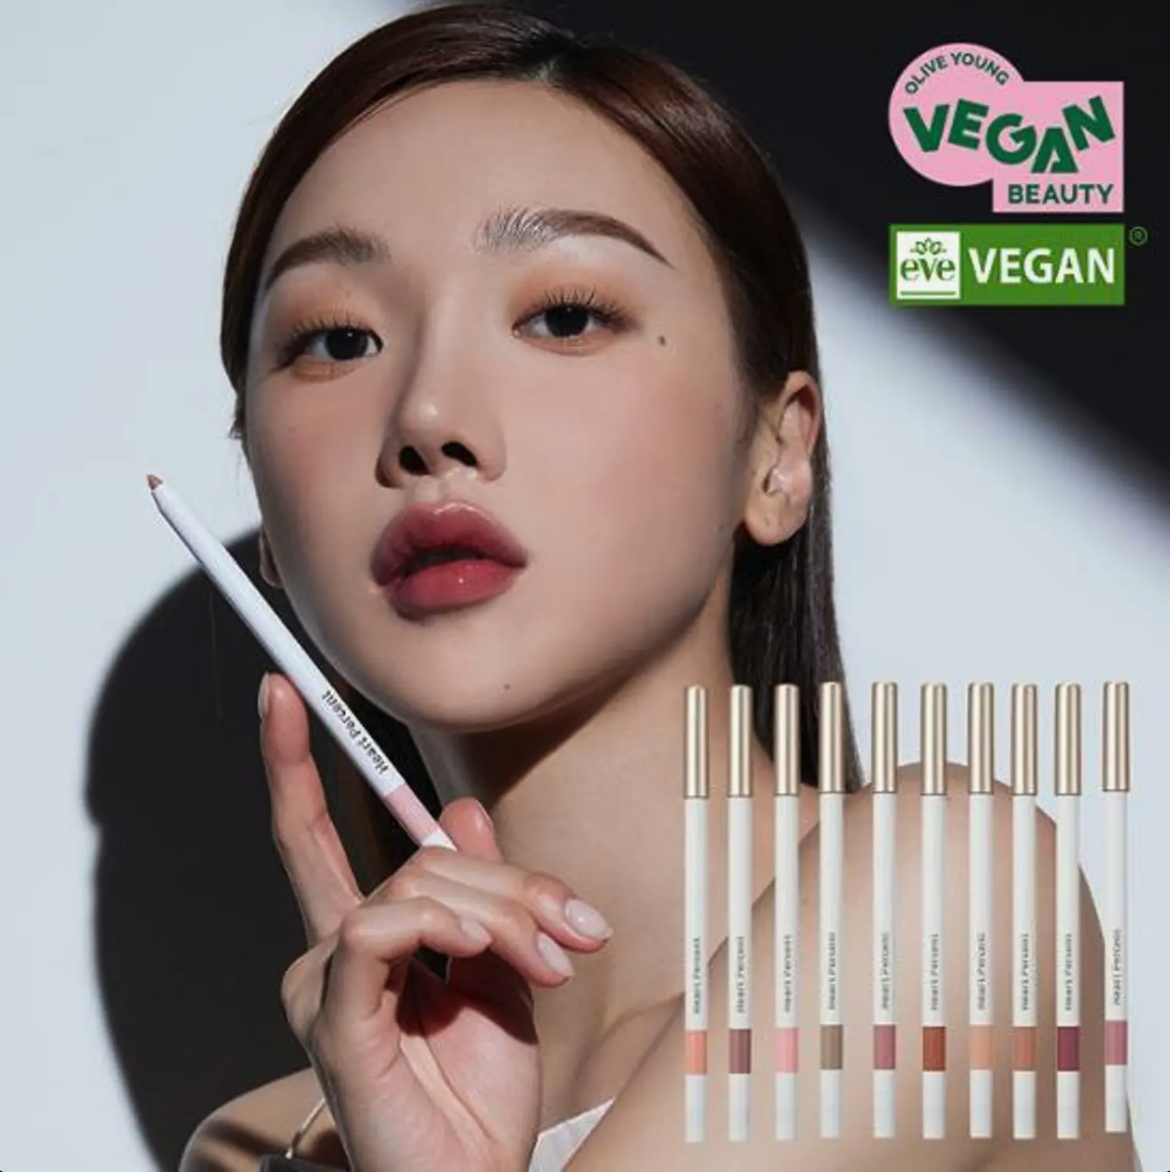

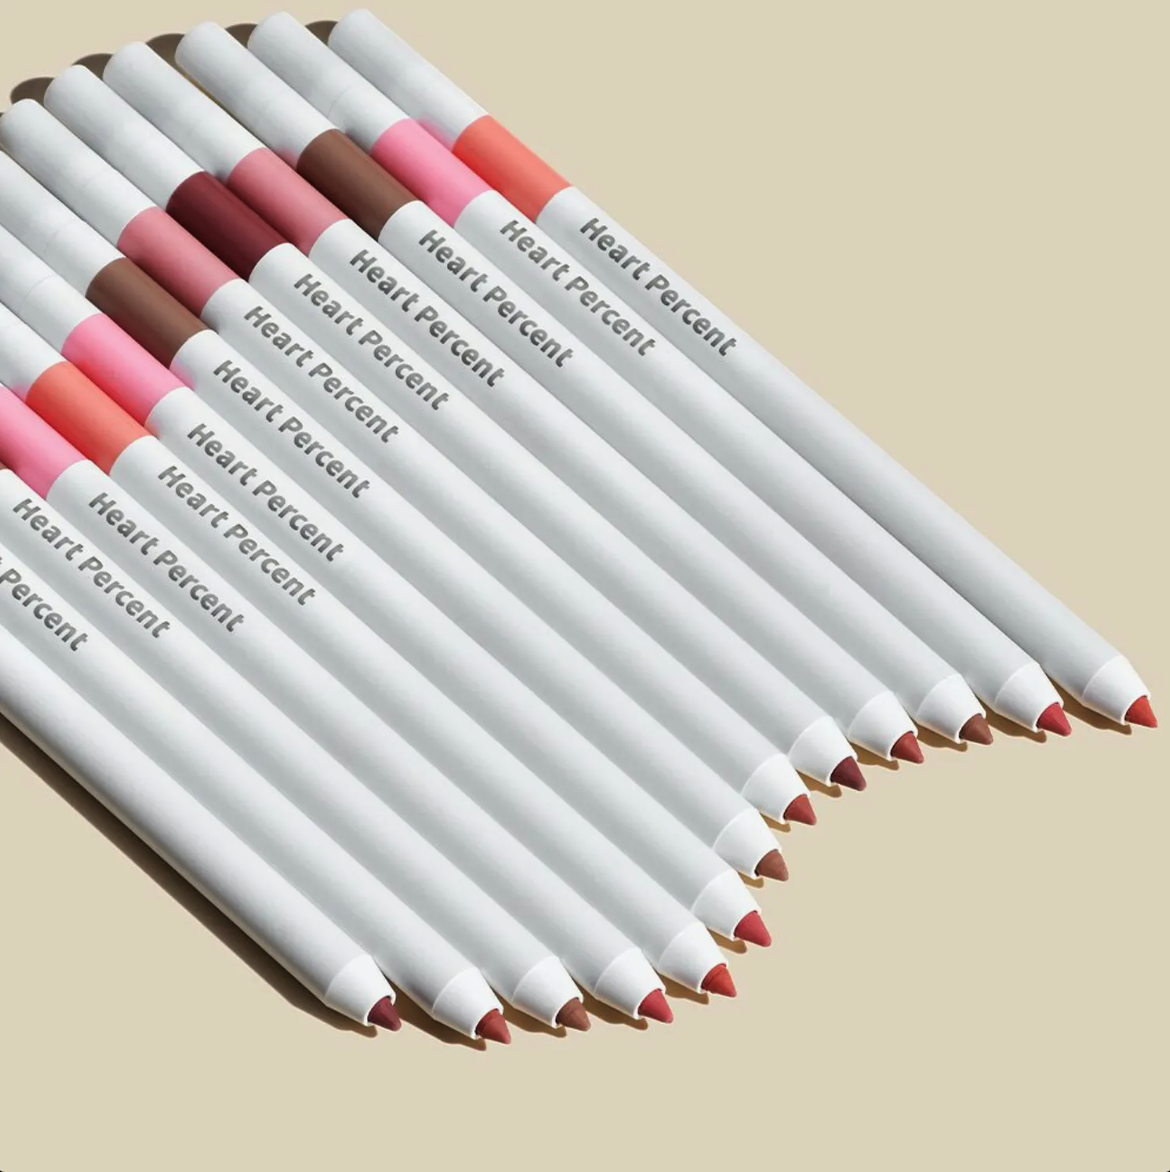

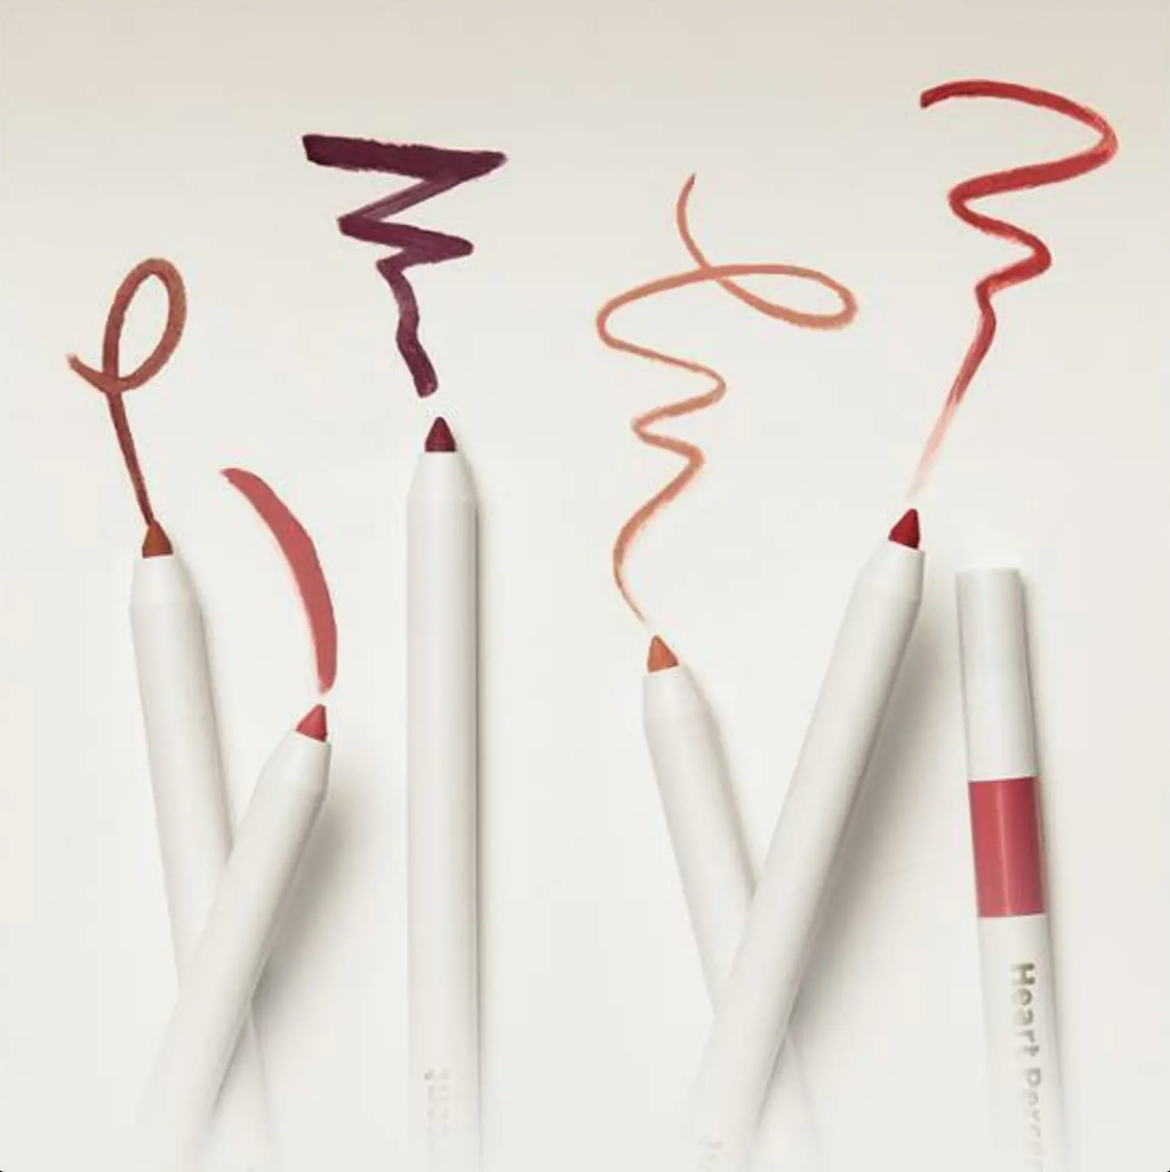

In [9]:
img_desc = ['model_with_pencils', 'just_pencils', 'pencil_lines']
images=['/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 11.08.49AM.png',
       '/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 11.09.00AM.png',
        '/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 11.09.06AM.png'
       ]
for imageName in images:
    display(Image2(filename=imageName))

In [10]:
# Combine the lists into a dictionary
image_dict = dict(zip(img_desc, images))

# Iterate through the dictionary
for desc, img in image_dict.items():
    print(f"Processing image description: {desc}")
    result = product_image_analysis(img)  # Call your analysis function
    print(f"Result for {desc}: {result}")

Processing image description: model_with_pencils
Result for model_with_pencils: {'high quality': 0.2228897660970688, 'professional': 0.20224063098430634, 'clear': 0.21527676284313202, 'well-lit': 0.20576900243759155, 'consistent branding': 0.22149285674095154}
Processing image description: just_pencils
Result for just_pencils: {'high quality': 0.20061443746089935, 'professional': 0.20495738089084625, 'clear': 0.1933327466249466, 'well-lit': 0.20624981820583344, 'consistent branding': 0.2167620062828064}
Processing image description: pencil_lines
Result for pencil_lines: {'high quality': 0.1829250603914261, 'professional': 0.19025887548923492, 'clear': 0.18756872415542603, 'well-lit': 0.1881324201822281, 'consistent branding': 0.2171313315629959}


Interesting that none of the pictures score high on any of the attributes even though from a human assessment, they all have at least:  "professional", "clear", "well-lit", "consistent branding".

In [11]:
# def generate_personalized_recommendations(customer_profile, purchase_history):
#     """
#     Generate personalized product recommendations using multiple data sources.
#     """
#     # Refine the prompt to guide the model explicitly
#     prompt = f"""Customer Profile:
#     Age: {customer_profile.get('age')}
#     Skin Type: {customer_profile.get('skin_type')}
#     Concerns: {', '.join(customer_profile.get('concerns', []))}
#     Recent Purchases: {', '.join(p['name'] for p in purchase_history[-3:])}

#     Based on the customer's profile and purchase history, recommend products to alleviate their beauty concerns.

#     Format the response as:
#     Product: [Product Name]
#     Reason: [Reason why this product was recommended].
    
#     Example:
#     Product: Brightening Serum
#     Reason: Helps address dark spots and promotes an even skin tone.
    
#     Now, please provide your recommendation:
#     """
    
#     # Tokenize the input with attention mask and padding
#     inputs = text_tokenizer(
#         prompt,
#         return_tensors="pt",
#         max_length=512,
#         truncation=True,
#         padding=True
#     )
    
#     # Generate text with the model
#     outputs = text_model.generate(
#         inputs['input_ids'],
#         attention_mask=inputs['attention_mask'],  # Pass the attention mask
#         max_length=200,
#         num_beams=5,
#         num_return_sequences=1,
#         pad_token_id=text_tokenizer.pad_token_id,  # Explicitly set pad_token_id
#         temperature=0.7
#     )
    
#     # Decode and parse the output
#     recommendations = []
#     for output in outputs:
#         text = text_tokenizer.decode(output, skip_special_tokens=True)
        
#         # Parse the output using the expected format
#         product = None
#         reasoning = None
#         for line in text.split('\n'):
#             if line.startswith("Product:"):
#                 product = line.replace("Product:", "").strip()
#             elif line.startswith("Reason:"):
#                 reasoning = line.replace("Reason:", "").strip()
        
#         # Only add valid recommendations
#         if product and reasoning:
#             recommendations.append({'product': product, 'reasoning': reasoning})
    
#     return print(f"Generated text:\n{text_tokenizer.decode(outputs[0], skip_special_tokens=True)}")

# # Example input
# customer_profile = {
#     'age': 28,
#     'skin_type': 'Normal',
#     'concerns': ['Fine Lines', 'Dark spots']
# }
# purchase_history = [
#     {'name': 'Cleanser X'},
#     {'name': 'Toner Y'},
#     {'name': 'Moisturizer Z'}
# ]

# Generate recommendations

# recommendations = generate_personalized_recommendations(
#     customer_profile,
#     purchase_history
# )
# print(f"Personalized Recommendations: {recommendations}\n")

# generate_personalized_recommendations(
#     customer_profile,
#     purchase_history
# )

Domain-Specific Fine-Tuning Issue.

The model may need fine-tuning on a dataset of customer profiles and recommendations to improve performance for this specific task.

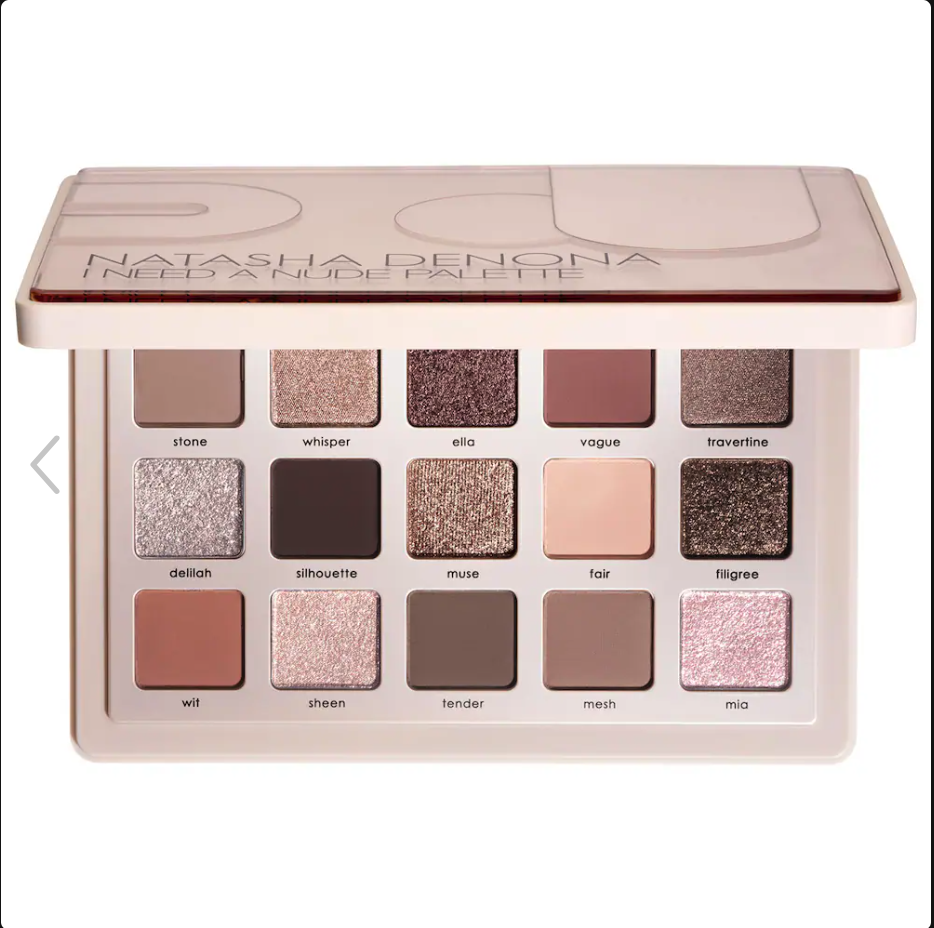

As a Sephora beauty assistant, based on both your question and the image you've shared, Will this palette work on winter cool with olive undertone gal?

I'm not sure if it will. I think it's going to be a bit of a stretch to say that it will, but I'm sure it will be a lot of fun to try it out.

What do you think of this palette? Do you like it or not? Let us know in the comments below!


In [12]:
def virtual_beauty_assistant(customer_query, image_path=None):
    """
    Multi-modal virtual beauty assistant
    """
    # Process text query
    response_context = "As a Sephora beauty assistant, "
    
    if image_path:
        # Process image if provided
        try:
            image = Image.open(image_path).convert("RGB")  # Convert to RGB mode
            image_features = vision_processor(images=image, return_tensors="pt")
            image_analysis = vision_model(**image_features)
            
            # Combine text and image understanding
            response_context += "based on both your question and the image you've shared, "
        except Exception as e:
            print(f"Error processing image: {e}")
            return "Sorry, I couldn't process the provided image."

    # Generate response
    prompt = f"{response_context}{customer_query}"
    inputs = text_tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True, padding=True)
    outputs = text_model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],  # Pass the attention mask
        max_length=200,
        num_return_sequences=1,
        num_beams=5,  # Enable beam search
        temperature=0.9,  # Increase diversity
        top_p=0.92,  # Nucleus sampling
        no_repeat_ngram_size=3,  # Avoid repetitive phrases
        pad_token_id=text_tokenizer.pad_token_id  # Explicitly set padding token ID
    )
    
    return text_tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example usage
response = virtual_beauty_assistant(
    "Will this palette work on winter cool with olive undertone gal?",
    "/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 7.49.35PM.png"
)
display(Image2(filename='/kaggle/input/e-commerce-event-data/Screenshot 2025-01-18 at 7.49.35PM.png'))
print(response)

In [13]:
# Example helper function to analyze sentiment
def analyze_sentiment(text):
    """
    Simulate sentiment analysis by returning a random score and label.
    """
    score = random.uniform(0, 1)  # Random sentiment score between 0 and 1
    label = "positive" if score > 0.6 else "negative" if score < 0.4 else "neutral"
    return {'score': score, 'label': label}

# Example helper function to update trending products
def _update_trending_products(post, sentiment):
    product = post.get('product')
    if product:
        if product not in trends['trending_products']:
            trends['trending_products'][product] = 1
        else:
            trends['trending_products'][product] += 1

# Example helper function to update sentiment by category
def _update_category_sentiment(post, sentiment):
    category = post.get('category', 'Unknown')
    if category not in trends['sentiment_by_category']:
        trends['sentiment_by_category'][category] = {'positive': 0, 'negative': 0, 'neutral': 0}
    trends['sentiment_by_category'][category][sentiment['label']] += 1

# Example helper function to extract keywords
def _extract_keywords(text):
    keywords = text.lower().split()[:3]  # Mock: Extract first 3 words as "keywords"
    for keyword in keywords:
        if keyword not in trends['emerging_keywords']:
            trends['emerging_keywords'][keyword] = 1
        else:
            trends['emerging_keywords'][keyword] += 1

# MAIN FUNCTION
def analyze_social_media_trends(posts):
    """
    Analyze beauty trends from social media data
    """
    global trends  # To allow helper functions to update trends
    trends = {
        'trending_products': {},
        'sentiment_by_category': {},
        'emerging_keywords': {}
    }
    
    # Process each post
    for post in posts:
        # Analyze text content
        sentiment = analyze_sentiment(post['text'])
        
        # Update trend data
        _update_trending_products(post, sentiment)
        _update_category_sentiment(post, sentiment)
        _extract_keywords(post['text'])
        
    return trends

# Sample social media data
posts = [
    {'text': "I love the Brightening Serum! It works wonders for my skin.", 'product': 'Brightening Serum', 'category': 'Skincare'},
    {'text': "This mascara is amazing, but it smudges a bit.", 'product': 'Volumizing Mascara', 'category': 'Makeup'},
    {'text': "The new fragrance smells divine. Totally worth it!", 'product': 'Luxury Fragrance', 'category': 'Fragrance'},
    {'text': "The lip gloss is nice, but it doesn’t last long.", 'product': 'Shiny Lip Gloss', 'category': 'Makeup'},
    {'text': "Hydrating Cream is a lifesaver for winter dry skin.", 'product': 'Hydrating Cream', 'category': 'Skincare'}
]

# Run the function
trends = analyze_social_media_trends(posts)

# Output results
print("Trends Analysis Results:")
print(trends)

Trends Analysis Results:
{'trending_products': {'Brightening Serum': 1, 'Volumizing Mascara': 1, 'Luxury Fragrance': 1, 'Shiny Lip Gloss': 1, 'Hydrating Cream': 1}, 'sentiment_by_category': {'Skincare': {'positive': 2, 'negative': 0, 'neutral': 0}, 'Makeup': {'positive': 1, 'negative': 0, 'neutral': 1}, 'Fragrance': {'positive': 1, 'negative': 0, 'neutral': 0}}, 'emerging_keywords': {'i': 1, 'love': 1, 'the': 3, 'this': 1, 'mascara': 1, 'is': 2, 'new': 1, 'fragrance': 1, 'lip': 1, 'gloss': 1, 'hydrating': 1, 'cream': 1}}


In [14]:
# Initialize sentiment analysis model and tokenizer
sentiment_tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
sentiment_model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

def analyze_sentiment(text):
    """
    Analyze sentiment of a given text.
    Returns sentiment label and confidence scores.
    """
    # Tokenize the input text
    inputs = sentiment_tokenizer(text, return_tensors="pt", truncation=True)
    
    # Get model outputs
    outputs = sentiment_model(**inputs)
    
    # Apply softmax to get probabilities
    probabilities = torch.softmax(outputs.logits, dim=1)
    
    # Get the predicted sentiment class
    sentiment_classes = ["1 star", "2 stars", "3 stars", "4 stars", "5 stars"]
    predicted_class = torch.argmax(probabilities, dim=1).item()
    
    # Return the predicted sentiment and confidence
    return {
        "text": text,
        "sentiment": sentiment_classes[predicted_class],
        "confidence": probabilities[0][predicted_class].item()
    }

# Sample comments mimicking beauty/makeup reviews
comments = [
    "This foundation gives me flawless coverage! Highly recommend.",
    "The lipstick is too dry and makes my lips crack.",
    "I love the fragrance of this perfume. It's subtle and long-lasting.",
    "The eyeshadow palette is okay but the colors aren't very pigmented.",
    "The moisturizer is amazing for my dry skin. My skin feels hydrated all day!"
]

# Analyze sentiment for each comment
for comment in comments:
    result = analyze_sentiment(comment)
    print(result)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

{'text': 'This foundation gives me flawless coverage! Highly recommend.', 'sentiment': '5 stars', 'confidence': 0.8967397212982178}
{'text': 'The lipstick is too dry and makes my lips crack.', 'sentiment': '2 stars', 'confidence': 0.5230256915092468}
{'text': "I love the fragrance of this perfume. It's subtle and long-lasting.", 'sentiment': '5 stars', 'confidence': 0.7743352651596069}
{'text': "The eyeshadow palette is okay but the colors aren't very pigmented.", 'sentiment': '3 stars', 'confidence': 0.7595959901809692}
{'text': 'The moisturizer is amazing for my dry skin. My skin feels hydrated all day!', 'sentiment': '5 stars', 'confidence': 0.8687167763710022}
